# Membuat Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seed untuk replikasi
np.random.seed(42)

# Membuat dataset besar
data = {
    'Feature': np.random.normal(loc=100, scale=20, size=1000),  # Data normal
    'Extreme': np.concatenate((np.random.normal(loc=50, scale=10, size=950),  # Data normal
                               np.random.normal(loc=500, scale=50, size=50))),  # Nilai ekstrem
    'Negative': np.random.normal(loc=-50, scale=30, size=1000)  # Data dengan nilai negatif
}
df = pd.DataFrame(data)

# Menambahkan nilai nol di beberapa kolom
df.loc[np.random.choice(df.index, size=20, replace=False), 'Negative'] = 0

# melihat dataframe
df.head()

,Feature,Extreme,Negative
0,109.934283,63.993554,-70.255348
1,97.234714,59.246337,-54.335560
2,112.953771,50.596304,-73.772598
3,130.460597,43.530632,-59.238846
4,95.316933,56.982233,-106.808440


In [2]:
# Melihat deskripsi data
print(df.describe())

           Feature      Extreme     Negative
count  1000.000000  1000.000000  1000.000000
mean    100.386641    73.482916   -48.818255
std      19.584319   100.573908    30.096230
min      35.174653    20.786495  -140.585365
25%      87.048194    44.413392   -68.975717
50%     100.506012    51.198058   -49.392453
75%     112.958878    58.950770   -29.428687
max     177.054630   656.887427    67.787131


# Membersihkan Data

In [3]:
# Membersihkan nilai ekstrem (IQR method)
Q1 = df['Extreme'].quantile(0.25)
Q3 = df['Extreme'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
df_cleaned = df[(df['Extreme'] >= lower_bound) & (df['Extreme'] <= upper_bound)]

# Mengatasi nilai negatif jika perlu
df_cleaned = df.copy()  # Pastikan membuat salinan
df_cleaned['Negative_Positive'] = df_cleaned['Negative'].apply(lambda x: x if x >= 0 else 0)

# Visualisasi Distribusi Sebelum Transformasi

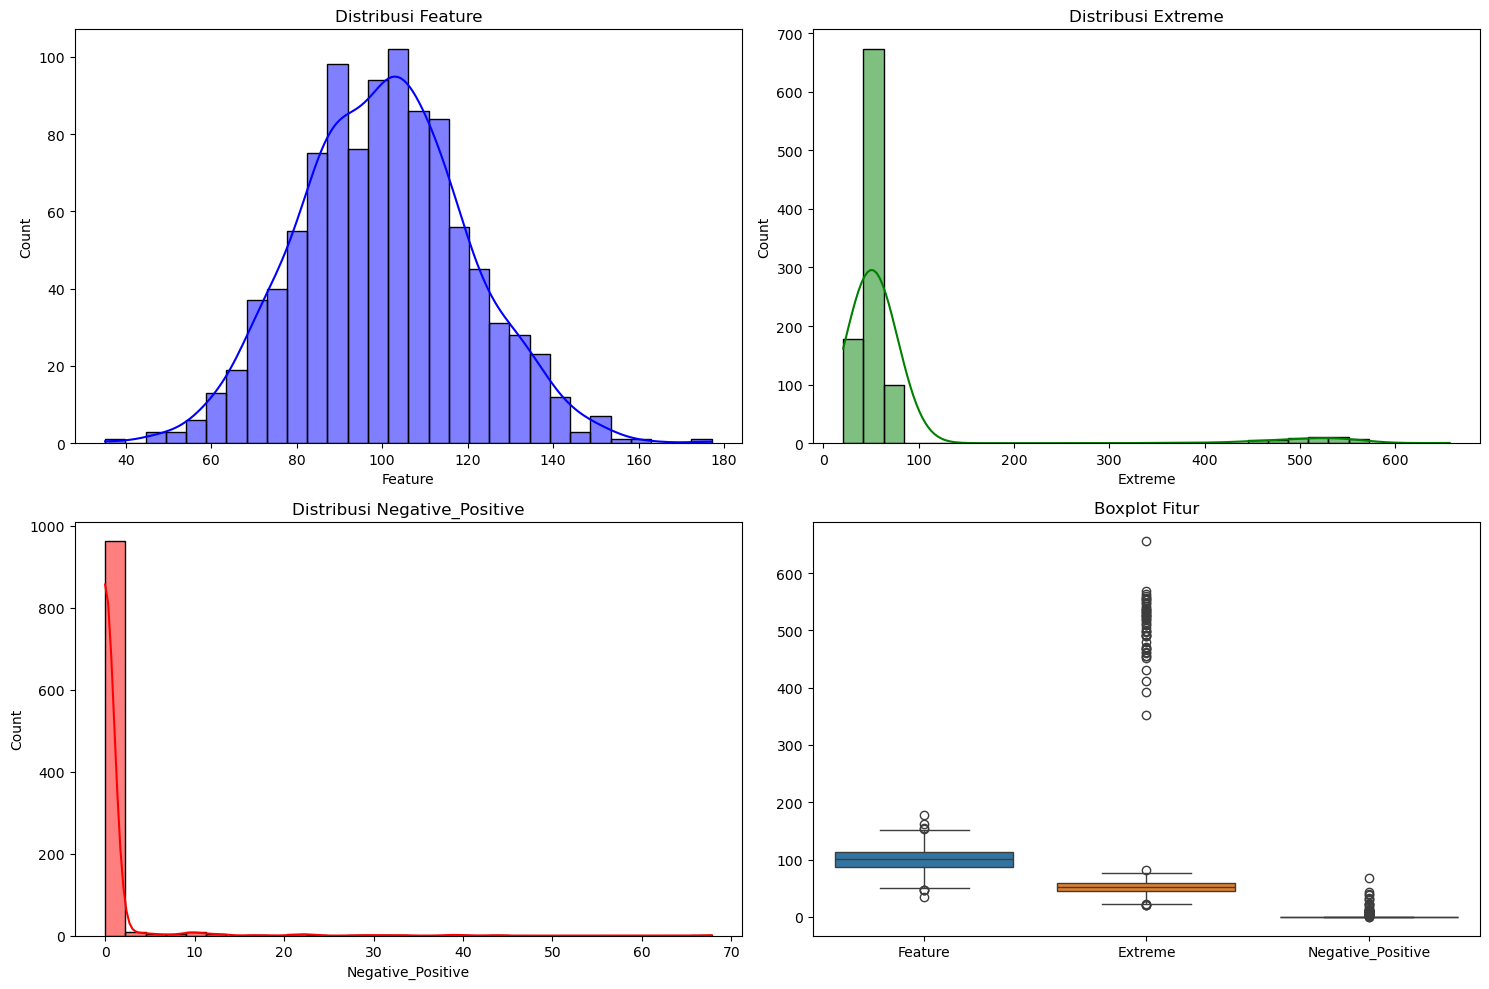

In [4]:
# Visualisasi distribusi sebelum transformasi
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Feature'], kde=True, bins=30, color='blue')
plt.title('Distribusi Feature')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Extreme'], kde=True, bins=30, color='green')
plt.title('Distribusi Extreme')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Negative_Positive'], kde=True, bins=30, color='red')
plt.title('Distribusi Negative_Positive')

# Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(data=df_cleaned[['Feature', 'Extreme', 'Negative_Positive']])
plt.title('Boxplot Fitur')

plt.tight_layout()
plt.show()

# Transformasi Data

## log Transform

In [5]:
df_cleaned['Feature_Log'] = np.log(df_cleaned['Feature'])
df_cleaned['Extreme_Log'] = np.log(df_cleaned['Extreme'] + 1)  # +1 untuk menghindari log(0)

print(f"Log: {df_cleaned['Feature_Log']} \n")
print(f"Log: {df_cleaned['Extreme_Log']}")

Log: 0      4.699883
1      4.577128
2      4.726979
3      4.871071
4      4.557207
         ...   
995    4.547308
996    4.912315
997    4.725766
998    4.483866
999    4.713591
Name: Feature_Log, Length: 1000, dtype: float64
Log: 0      4.174288
1      4.098442
2      3.943450
3      3.796177
4      4.060137
         ...   
995    6.318080
996    6.213956
997    6.124478
998    6.200198
999    6.139356
Name: Extreme_Log, Length: 1000, dtype: float64


## Square Root Transform

In [6]:
df_cleaned['Feature_Sqrt'] = np.sqrt(df_cleaned['Feature'])
df_cleaned['Extreme_Sqrt'] = np.sqrt(df_cleaned['Extreme'])

print(f"Square Root: {df_cleaned['Feature_Sqrt']} \n")
print(f"Square Root: {df_cleaned['Extreme_Sqrt']}")

Square Root: 0      10.484955
1       9.860766
2      10.627971
3      11.421935
4       9.763039
         ...    
995     9.714834
996    11.659920
997    10.621528
998     9.411505
999    10.557067
Name: Feature_Sqrt, Length: 1000, dtype: float64
Square Root: 0       7.999597
1       7.697164
2       7.113108
3       6.597775
4       7.548658
         ...    
995    23.526740
996    22.331008
997    21.351962
998    22.177616
999    21.511738
Name: Extreme_Sqrt, Length: 1000, dtype: float64


## Box-Cox Transform

In [7]:
from scipy.stats import boxcox

# Hanya untuk nilai positif
df_cleaned['Feature_BoxCox'], lambda_feature = boxcox(df_cleaned['Feature'])

print(f"Box-Cox: {lambda_feature}")

Box-Cox: 0.8172399228013534


## Yeo-Johnson Transform

In [8]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_cleaned['Negative_YeoJohnson'] = pt.fit_transform(df_cleaned[['Negative_Positive']])

print(f"Yeo-Johnson: {df_cleaned['Negative_YeoJohnson']}")

Yeo-Johnson: 0     -0.221973
1     -0.221973
2     -0.221973
3     -0.221973
4     -0.221973
         ...   
995   -0.221973
996   -0.221973
997   -0.221973
998   -0.221973
999   -0.221973
Name: Negative_YeoJohnson, Length: 1000, dtype: float64


# Visualisasi Distribusi Setelah Transformasi

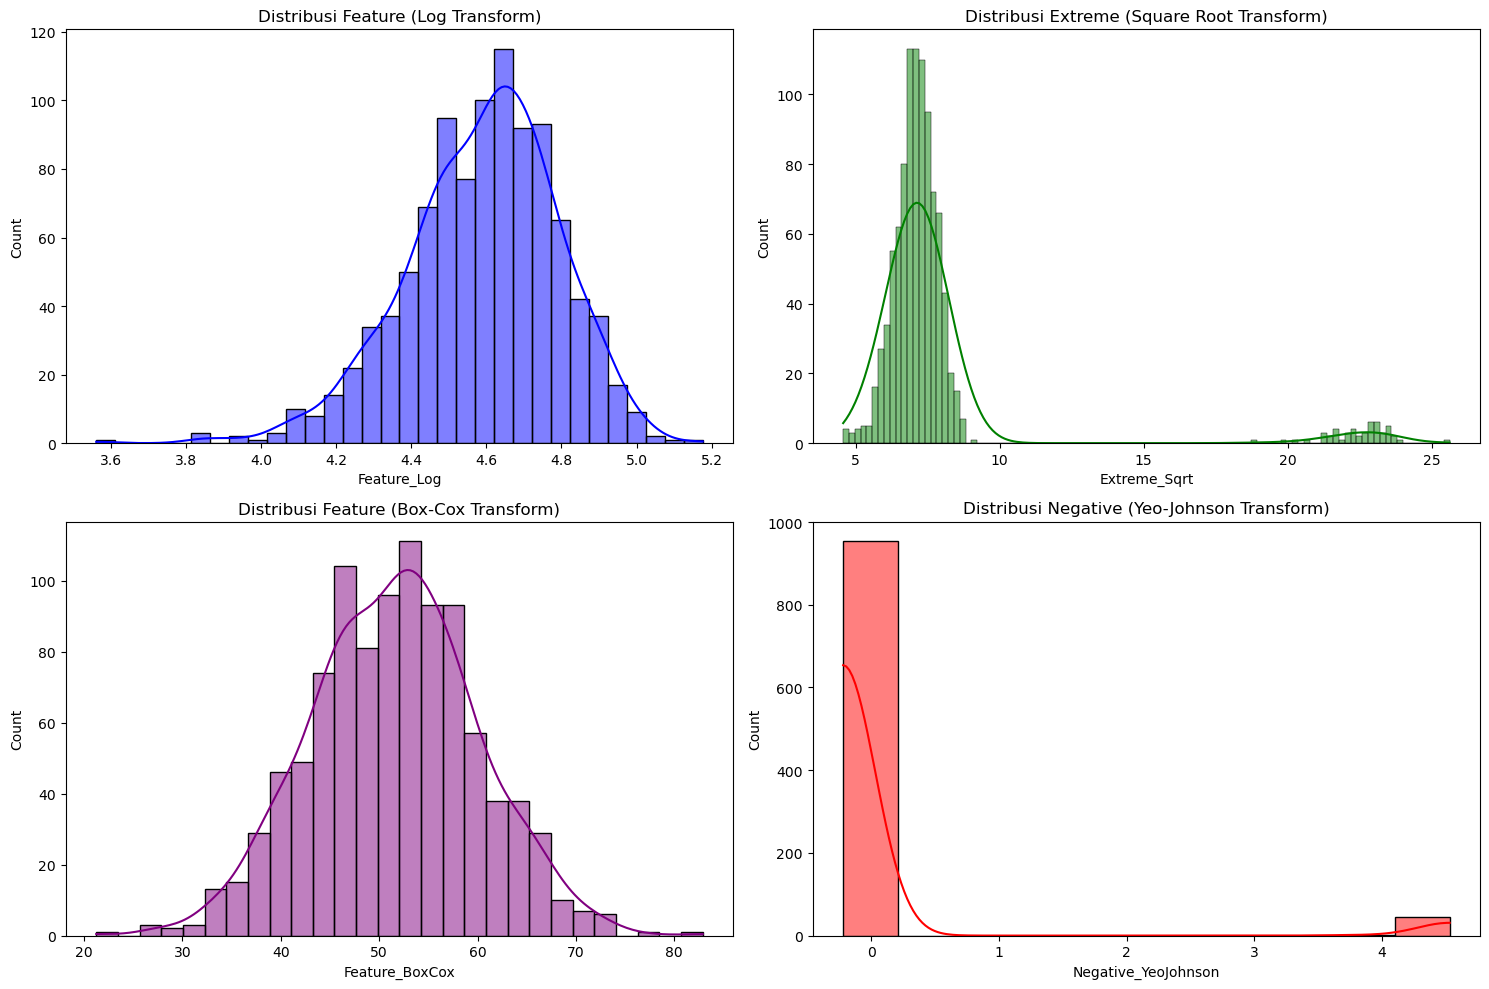

In [9]:
plt.figure(figsize=(15, 10))

# Feature setelah transformasi log
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Feature_Log'], kde=True, color='blue')
plt.title('Distribusi Feature (Log Transform)')

# Extreme setelah transformasi square root
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Extreme_Sqrt'], kde=True, color='green')
plt.title('Distribusi Extreme (Square Root Transform)')

# Feature setelah transformasi Box-Cox
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Feature_BoxCox'], kde=True, color='purple')
plt.title('Distribusi Feature (Box-Cox Transform)')

# Negative setelah transformasi Yeo-Johnson
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Negative_YeoJohnson'], kde=True, color='red')
plt.title('Distribusi Negative (Yeo-Johnson Transform)')

plt.tight_layout()
plt.show()

# Menangani Data Tidak Seimbang (Imbalanced Data)

install imbalanced-learn

### Oversampling

Kapan Tidak Menggunakan train_test_split:
1. Jika Dataset Kecil
2. Jika Hanya Analisis Data

Rekomendasi:
1. Gunakan train_test_split (atau metode pembagian lain seperti stratified split)
2. Hindari sampling pada data pengujian, baik itu oversampling maupun undersampling

#### SMOTE

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Cek distribusi awal
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_train_smote))


#### ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

# Cek distribusi awal
print("Distribusi kelas sebelum ADASYN:", Counter(y_train))

# Oversampling dengan ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Cek distribusi setelah ADASYN
print("Distribusi kelas setelah ADASYN:", Counter(y_train_adasyn))


### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
print("Distribusi kelas setelah Undersampling:", Counter(y_under))


### Combination

1. SMOTEENN: Kombinasi SMOTE (oversampling) dan Edited Nearest Neighbors (ENN) untuk menghapus titik mayoritas yang salah dikelompokkan setelah oversampling.
    1. Dataset memiliki banyak noise atau data outlier di sekitar kelas minoritas.
    2. Ingin memperbaiki keputusan di sekitar perbatasan kelas.
    3. Mengutamakan akurasi prediksi meskipun prosesnya lebih lambat.

2. SMOTETomek: Kombinasi SMOTE (oversampling) dan Tomek Links (menghapus tumpang tindih data mayoritas).
    1. Dataset memiliki ketidakseimbangan ringan.
    2. Ingin menghapus pasangan data yang ambigu (Tomek Links).
    3. Mengutamakan kecepatan proses.

#### SMOTEEN

In [ ]:
from imblearn.combine import SMOTEENN

# Kombinasi SMOTE dan ENN
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("Distribusi kelas setelah SMOTEENN:", Counter(y_smoteenn))


#### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

# Kombinasi SMOTE dan Tomek Links
smotetomek = SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train, y_train)
print("Distribusi kelas setelah SMOTETomek:", Counter(y_smotetomek))


# Cek Multikolinearitas (>10 menunjukkan multikolinearitas)

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Contoh dataset
data = {
    "lot_area": [8500, 9600, 11250, 9550, 14260],
    "gr_liv_area": [1710, 1262, 1786, 1717, 2198],
    "sale_price": [208500, 181500, 223500, 140000, 250000]
}
df = pd.DataFrame(data)

# Korelasi Pearson
correlation = df.corr()
print("Korelasi antar fitur:\n", correlation)

# Variance Inflation Factor (VIF)
X = df[['lot_area', 'gr_liv_area', 'sale_price']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF:\n", vif_data)


# Menghapus Noise atau Data Tidak Relevan (VarianceThreshold, SelectKBest, dan RecursiveFeatureElimination)

1. Feature Selection dengan Statistik:
    1. Chi-Square Test: Mengukur ketergantungan antar variabel kategorikal.
    2. Mutual Information: Mengukur informasi bersama antara fitur dan target.

2. Recursive Feature Elimination (RFE): Seleksi fitur iteratif untuk menemukan subset fitur terbaik.


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Contoh dataset
data = {
    "feature1": [0, 0, 0, 0, 0],
    "feature2": [1, 2, 1, 2, 1],
    "feature3": [50, 60, 55, 65, 58]
}
df = pd.DataFrame(data)

# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
df_reduced = selector.fit_transform(df)
print("Fitur setelah penghapusan noise:\n", df.columns[selector.get_support()])
